<a href="https://colab.research.google.com/github/kimdongha723/kdh723/blob/main/BTC_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pyupbit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 106 kB 8.2 MB/s 


In [2]:
!pip install pystan~=2.14
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62.6 MB 1.5 MB/s 
  Attempting uninstall: pystan
    Found existing installation: pystan 3.3.0
    Uninstalling pystan-3.3.0:
      Successfully uninstalled pystan-3.3.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 64 kB 1.7 MB/s 
  Created wheel for fbprophet: filename=fbprophet-0.7.1-py3-none-any.whl size=6751265 sha256=a2bb9578b56d6564902e32e0ccd7ed13c837f2919723102aed953ec04f3495db
  Stored in directory: /root/.cache/pip/wheels/d0/d2/ae/c579b7fd160999d35908f3cb8ebcad7ef64ecaca7b78e4c3c8
Successfully built fbprophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 1.0.8
    Uninstalling cmdstanpy-1.0.8:
      Successfully uninstalled cmdstanpy-1.0.8
ERROR: pip's dependency resolver does not currently take into account all the 

In [3]:
import pyupbit

In [94]:
#BTC 최근 200시간의 데이터 불러옴
df = pyupbit.get_ohlcv("KRW-axs", interval="minute15")
df

,open,high,low,close,volume,value
2022-12-07 11:00:00,12040.0,12050.0,11990.0,12020.0,65293.426728,7.849857e+08
2022-12-07 11:15:00,12020.0,12030.0,11760.0,11820.0,361652.758110,4.301576e+09
2022-12-07 11:30:00,11820.0,11850.0,11680.0,11790.0,324151.349134,3.809426e+09
2022-12-07 11:45:00,11790.0,11800.0,11700.0,11750.0,131951.747732,1.548129e+09
2022-12-07 12:00:00,11740.0,11880.0,11740.0,11840.0,140053.637038,1.653441e+09
...,...,...,...,...,...,...
2022-12-09 11:45:00,10840.0,10850.0,10800.0,10820.0,21065.537170,2.278736e+08
2022-12-09 12:00:00,10820.0,10840.0,10800.0,10800.0,7754.832810,8.395845e+07
2022-12-09 12:15:00,10800.0,10840.0,10800.0,10820.0,12245.457633,1.325286e+08
2022-12-09 12:30:00,10820.0,10840.0,10810.0,10830.0,5690.808694,6.157002e+07


In [95]:
#시간(ds)와 종가(y)값만 남김
df = df.reset_index()
df['ds'] = df['index']
df['y'] = df['close']
data = df[['ds','y']]
data

,ds,y
0,2022-12-07 11:00:00,12020.0
1,2022-12-07 11:15:00,11820.0
2,2022-12-07 11:30:00,11790.0
3,2022-12-07 11:45:00,11750.0
4,2022-12-07 12:00:00,11840.0
...,...,...
195,2022-12-09 11:45:00,10820.0
196,2022-12-09 12:00:00,10800.0
197,2022-12-09 12:15:00,10820.0
198,2022-12-09 12:30:00,10830.0


In [96]:
#prophet 불러옴
from fbprophet import Prophet

In [97]:
#학습
model = Prophet()
model.fit(data)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


In [98]:
#24시간 미래 예측
future = model.make_future_dataframe(periods=20, freq='H')
forecast = model.predict(future)

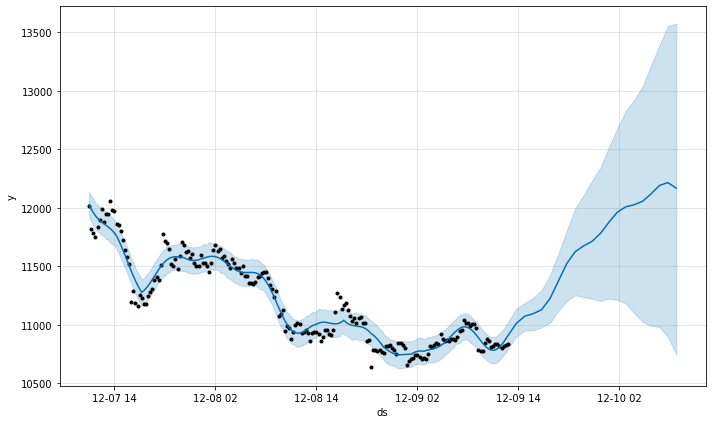

In [99]:
#그래프1
fig1 = model.plot(forecast)

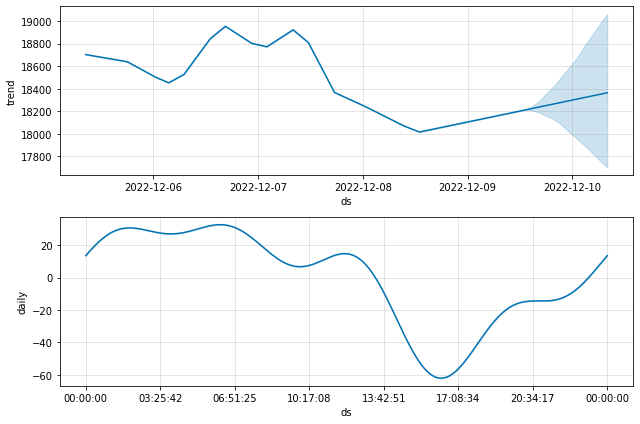

In [11]:
 #그래프2
fig2 = model.plot_components(forecast)